In [1]:
from anndata import AnnData
from main_ import scAAE
from utils import data_preprocess,compute_asw,compute_ARI_NMI
import scanpy as sc
import numpy as np
import time
import os
import pandas as pd
from matplotlib.pyplot import rc_context

## Initialization

In [2]:
sc.set_figure_params(dpi=100)
sc.settings.verbosity = 1
sc.logging.print_header()

input_dir = 'data'
res_dir = 'result'
method_name = 'scAAE'
data_name = 'panc_rm'
data_path = os.path.join(input_dir,data_name+'.loom')
save_loom_path = os.path.join(res_dir,method_name+'_'+data_name+'.loom')
save_batch_png_path = '_'+method_name+'_'+data_name+'_batch.png'
save_celltype_png_path ='_'+method_name+'_'+data_name+'_celltype.png'

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.2 scipy==1.5.2 pandas==1.2.3 scikit-learn==1.0.1 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0


## scAAE

In [3]:
start_time = time.time()

adata = sc.read_loom(data_path,sparse = False)
adata.obs['batch'] = adata.obs['batch'].astype('category')

In [4]:
adata.X = np.float32(np.int32(adata.X))
adata = data_preprocess(adata)

/opt/anaconda3/envs/zcg-TieNet-py37/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.obs` of view, copying.
/opt/anaconda3/envs/zcg-TieNet-py37/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:144: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[: int(n_top_genes), 'highly_variable'] = True


PreProcess Done.


In [5]:
out= scAAE(adata,n_epochs=300,batch_size=1024,n_critic=5)

end_time = time.time()
print("Time consuming: "+str(end_time-start_time))

(10156, 2000)
10156
[Epoch 1/300] [D loss: -1.461785] [G loss: 0.979013]
[Epoch 2/300] [D loss: -5.322229] [G loss: 10.342741]
[Epoch 3/300] [D loss: -2.209034] [G loss: 8.193949]
[Epoch 4/300] [D loss: -2.513153] [G loss: 6.126281]
[Epoch 5/300] [D loss: -2.879274] [G loss: 6.093482]
[Epoch 6/300] [D loss: -2.941392] [G loss: 5.468029]
[Epoch 7/300] [D loss: -3.526918] [G loss: 4.904665]
[Epoch 8/300] [D loss: -3.768519] [G loss: 4.454642]
[Epoch 9/300] [D loss: -3.432849] [G loss: 3.811435]
[Epoch 10/300] [D loss: -4.160887] [G loss: 3.912589]
[Epoch 11/300] [D loss: -4.732603] [G loss: 3.774659]
[Epoch 12/300] [D loss: -5.012235] [G loss: 3.108338]
[Epoch 13/300] [D loss: -4.683484] [G loss: 5.186481]
[Epoch 14/300] [D loss: -3.989057] [G loss: 4.170743]
[Epoch 15/300] [D loss: -3.379946] [G loss: 2.428363]
[Epoch 16/300] [D loss: -2.963595] [G loss: 1.329463]
[Epoch 17/300] [D loss: -2.728141] [G loss: -0.032024]
[Epoch 18/300] [D loss: -2.500860] [G loss: 0.441579]
[Epoch 19/300] 

## Evaluation

In [6]:
res = AnnData(out,adata.obs)
# res.write_loom(save_loom_path,write_obsm_varm=True)
sc.pp.neighbors(res)
sc.tl.umap(res)

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'ClusterName' as categorical
... storing 'celltype' as categorical


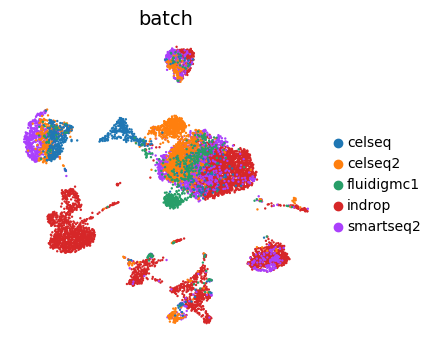

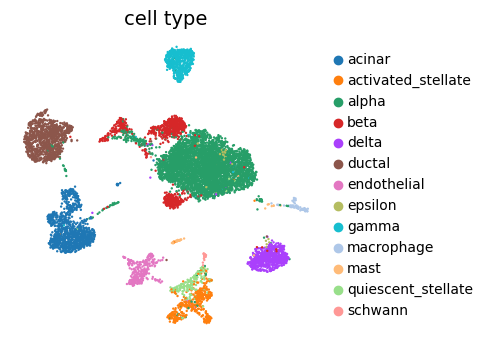

In [7]:
sc.pl.umap(res,color=['batch'], add_outline=False,legend_fontsize=10,frameon=False,title='batch',save=save_batch_png_path)
sc.pl.umap(res,color=['celltype'], add_outline=False,legend_fontsize=10,frameon=False,title='cell type',save=save_celltype_png_path)

In [8]:
arr = res.obsm['X_pca']
batch_label = res.obs['batch'].tolist()
cell_label = res.obs['celltype'].tolist()

asw_batch_score, asw_celltype_score = compute_asw(arr, batch_label, cell_label)
print("ASW score：")
print(asw_batch_score,asw_celltype_score)

batch_ARI, cell_ARI,batch_NMI,cell_NMI = compute_ARI_NMI(res)
print("ARI score：")
print(batch_ARI, cell_ARI)

print("NMI score：")
print(batch_NMI, cell_NMI)


ASW score：
-0.15370433 0.23954365
ARI score：
-0.004184261815233259 0.5208516139431034
NMI score：
0.1316179558381829 0.7386465666889391
LISI score：

